# Customers and Products Analysis

###### Sales Data Analysis for Cars: Extracting Insights for Informed Decision-Making

### Introduction 

The application of data analysis has demonstrated significant efficacy in sales due to the extraction of key performance indicators (KPIs) that enable informed decision-making. By leveraging data insights, valuable resources such as time, resources, and finances can be saved.

Sales data analysis encompasses a broad range of aspects, including sales, production, customer experience, and employee efficiency. Consequently, it presents several challenges that require specialized skills and expertise. Undertaking a project in this domain can provide a platform to showcase one's competencies and capabilities.

The primary objective of this project is to conduct an in-depth analysis of sales records pertaining to scale model cars and extract relevant information to facilitate effective decision-making.

###### Database Schema is as follows.

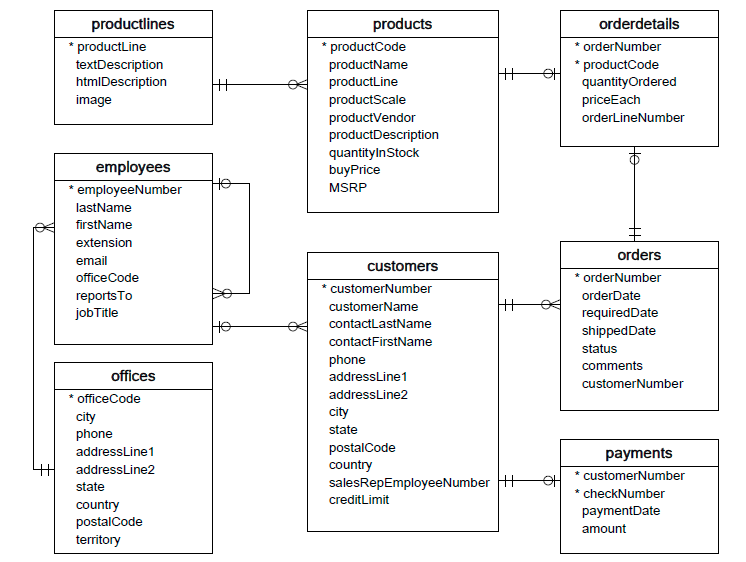

Database contains eight tables:

-   `Customers:` customer data
-   `Employees:` all employee information
-   `Offices:` sales office information
-   `Orders:` customers' sales orders
-   `OrderDetails:` sales order line for each sales order
-   `Payments:` customers' payment records
-   `Products:` a list of scale model cars
-   `ProductLines:` a list of product line categories

# Which Products Should We Order More of or Less of?

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
db = "stores.db"
conn = sql.connect("stores.db")

In [3]:
def run_query(q):
    return pd.read_sql(q, conn)

In [4]:
x = """
select name from sqlite_master where type = "table"

"""
run_query(x)

,name
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products


In [42]:
# Low Stock:

low_stock = """
select
p.productCode,
round(sum(quantityOrdered)/ cast (quantityInStock as float),2)  low_stock
from products p
inner join orderdetails od on od.productCode = p.productCode
group by 1 order by 2 desc  limit 10
"""
run_query(low_stock)

,productCode,low_stock
0,S24_2000,67.67
1,S12_1099,13.72
2,S32_4289,7.15
3,S32_1374,5.70
4,S72_3212,2.31
5,S700_3167,1.90
6,S50_4713,1.65
7,S18_2795,1.61
8,S18_2248,1.54
9,S700_1938,1.22


In [6]:
# Product Performance: 

Product_performance= """
select
p.productCode,
sum (od.quantityOrdered* od.priceEach) prod_performance
from orderdetails od
inner join products p on od.productCode = p.productCode
group by 1 order by 2 desc limit 10
"""
run_query(Product_performance)

,productCode,prod_performance
0,S18_3232,276839.98
1,S12_1108,190755.86
2,S10_1949,190017.96
3,S10_4698,170686.00
4,S12_1099,161531.48
5,S12_3891,152543.02
6,S18_1662,144959.91
7,S18_2238,142530.63
8,S18_1749,140535.60
9,S12_2823,135767.03


Based on the analysis of the inventory reports, it can be concluded that we order more of the products that are performing well and have low stock levels. The products that have demonstrated high product performance are in high demand, so it's important that we have enough inventory on hand to meet customer demand and maximize sales opportunities. The data is given as follows for consideration:

# How Should We Match Marketing and Communication Strategies to Customer Behavior?

In [45]:
combined_query = """with ls as
(select
p.productCode,
od.quantityOrdered,
od.priceEach,
p.quantityInStock
from orderdetails od
inner join products p on od.productCode = p.productCode
)
select 
productCode,
prod_performance
from

(select
productCode,
round(sum(quantityOrdered)/ cast (quantityInStock as float),2)  low_stock,
sum (quantityOrdered* priceEach) prod_performance
from ls
group by 1 order by 2 desc  limit 10)
group by 1 order by 2 desc
"""
run_query(combined_query)

,productCode,prod_performance
0,S12_1099,161531.48
1,S18_2795,132275.98
2,S32_1374,89364.89
3,S700_3167,76618.40
4,S50_4713,73670.64
5,S700_1938,69531.61
6,S24_2000,67193.49
7,S32_4289,60493.33
8,S72_3212,47550.40
9,S18_2248,45306.77


In [20]:
# Profit by Customer:

profit_by_customer = """
select 
customerNumber,
sum(priceEach* quantityOrdered) - sum(buyPrice * quantityOrdered) profit
from products p
inner join orderdetails od on p.productCode = od.productCode
inner join orders o on o.orderNumber = od.orderNumber
group by 1 




"""
run_query(profit_by_customer)

,customerNumber,profit
0,103,10063.80
1,112,31312.72
2,114,70311.07
3,119,60875.30
4,121,41391.52
...,...,...
93,486,33598.57
94,487,17230.12
95,489,10868.04
96,495,25244.69


In [32]:
# Top 5 VIP Customers:

vip_customers = """
with profit_by_customer as (
select 
customerNumber,
sum(priceEach* quantityOrdered) - sum(buyPrice * quantityOrdered) profit
from products p
inner join orderdetails od on p.productCode = od.productCode
inner join orders o on o.orderNumber = od.orderNumber
group by 1 )

select
contactLastName,
contactFirstName,
city,
country,
pbc.profit
from customers c
join profit_by_customer pbc on c.customerNumber = pbc.customerNumber
order by profit desc limit 5;



"""
run_query(vip_customers)

,contactLastName,contactFirstName,city,country,profit
0,Freyre,Diego,Madrid,Spain,326519.66
1,Nelson,Susan,San Rafael,USA,236769.39
2,Young,Jeff,NYC,USA,72370.09
3,Ferguson,Peter,Melbourne,Australia,70311.07
4,Labrune,Janine,Nantes,France,60875.30


In [36]:
# Top 5 less Engaging Customers:

less_eng_cust = """
with profit_by_customer as (
select 
customerNumber,
sum(priceEach* quantityOrdered) - sum(buyPrice * quantityOrdered) profit
from products p
inner join orderdetails od on p.productCode = od.productCode
inner join orders o on o.orderNumber = od.orderNumber
group by 1 )

select
contactLastName,
contactFirstName,
city,
country,
pbc.profit
from customers c
join profit_by_customer pbc on c.customerNumber = pbc.customerNumber
order by profit asc limit 5;



"""
run_query(less_eng_cust)

,contactLastName,contactFirstName,city,country,profit
0,Young,Mary,Glendale,USA,2610.87
1,Taylor,Leslie,Brickhaven,USA,6586.02
2,Ricotti,Franco,Milan,Italy,9532.93
3,Schmitt,Carine,Nantes,France,10063.80
4,Smith,Thomas,London,UK,10868.04


After observing profit by customer and categorizing customers into VIP and less engaged segments, marketing and communication strategies can be adapted to each group to maximize engagement and ultimately drive sales. Given above is the data for consideration:

# How Much Can We Spend on Acquiring New Customers?

In [46]:
# Customer Lifetime Value

Cust_ltv = """
with pbc as(
select 
customerNumber,
sum(priceEach* quantityOrdered) - sum(buyPrice * quantityOrdered) profit
from products p
inner join orderdetails od on p.productCode = od.productCode
inner join orders o on o.orderNumber = od.orderNumber
group by 1 
)
select avg(profit) ltv from pbc  

"""
run_query(Cust_ltv)

,ltv
0,39039.594388


By calculating Customer Lifetime Value (LTV) we can estimate the net profit a company has earned over the course of its relationship with a particular customer which can consequently be used to allocate resources effectively and focus on customer retention strategies that will maximize long-term profitability. Given above is the the data showing Customer Lifetime Value:
